In [76]:
import sys
print(sys.executable)


c:\Users\Rahul_\code\project\medicine_recommendation\python311env\Scripts\python.exe


In [77]:
import pandas as pd
import os

In [30]:
import pyaudio

In [40]:
path=r'C:\Users\Rahul_\code\project\medicine_recommendation\data'

In [41]:
precautions=pd.read_csv(os.path.join(path,"precautions_df.csv"))
workout=pd.read_csv(os.path.join(path,"workout_df.csv"))
description=pd.read_csv(os.path.join(path,"description.csv"))
diets=pd.read_csv(os.path.join(path,"diets.csv"))
symptoms=pd.read_csv(os.path.join(path,"symtoms_df.csv"))
medications = pd.read_csv(os.path.join(path,"medications.csv"))

In [42]:
import pickle
with open(r'C:\Users\Rahul_\code\project\medicine_recommendation\models\encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)


c:\Users\Rahul_\code\project\medicine_recommendation\python311env\Lib\site-packages\sklearn\base.py:440: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.6.1 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [43]:
import pickle


with open(r'C:\Users\Rahul_\code\project\medicine_recommendation\models\disease_dict.pkl', 'rb') as f:
    disease_dict = pickle.load(f)

with open(r'C:\Users\Rahul_\code\project\medicine_recommendation\models\svc.pkl', 'rb') as f:
    svc = pickle.load(f)
with open(r'C:\Users\Rahul_\code\project\medicine_recommendation\models\symp_dict.pkl', 'rb') as f:
    symp_dict = pickle.load(f)



c:\Users\Rahul_\code\project\medicine_recommendation\python311env\Lib\site-packages\sklearn\base.py:440: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.6.1 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [44]:
symp_dict

{'itching': 0,
 'skin_rash': 1,
 'nodal_skin_eruptions': 2,
 'continuous_sneezing': 3,
 'shivering': 4,
 'chills': 5,
 'joint_pain': 6,
 'stomach_pain': 7,
 'acidity': 8,
 'ulcers_on_tongue': 9,
 'muscle_wasting': 10,
 'vomiting': 11,
 'burning_micturition': 12,
 'spotting_ urination': 13,
 'fatigue': 14,
 'weight_gain': 15,
 'anxiety': 16,
 'cold_hands_and_feets': 17,
 'mood_swings': 18,
 'weight_loss': 19,
 'restlessness': 20,
 'lethargy': 21,
 'patches_in_throat': 22,
 'irregular_sugar_level': 23,
 'cough': 24,
 'high_fever': 25,
 'sunken_eyes': 26,
 'breathlessness': 27,
 'sweating': 28,
 'dehydration': 29,
 'indigestion': 30,
 'headache': 31,
 'yellowish_skin': 32,
 'dark_urine': 33,
 'nausea': 34,
 'loss_of_appetite': 35,
 'pain_behind_the_eyes': 36,
 'back_pain': 37,
 'constipation': 38,
 'abdominal_pain': 39,
 'diarrhoea': 40,
 'mild_fever': 41,
 'yellow_urine': 42,
 'yellowing_of_eyes': 43,
 'acute_liver_failure': 44,
 'fluid_overload': 45,
 'swelling_of_stomach': 46,
 'swelle

In [45]:
disease_dict

{np.int64(0): '(vertigo) Paroymsal  Positional Vertigo',
 np.int64(1): 'AIDS',
 np.int64(2): 'Acne',
 np.int64(3): 'Alcoholic hepatitis',
 np.int64(4): 'Allergy',
 np.int64(5): 'Arthritis',
 np.int64(6): 'Bronchial Asthma',
 np.int64(7): 'Cervical spondylosis',
 np.int64(8): 'Chicken pox',
 np.int64(9): 'Chronic cholestasis',
 np.int64(10): 'Common Cold',
 np.int64(11): 'Dengue',
 np.int64(12): 'Diabetes ',
 np.int64(13): 'Dimorphic hemmorhoids(piles)',
 np.int64(14): 'Drug Reaction',
 np.int64(15): 'Fungal infection',
 np.int64(16): 'GERD',
 np.int64(17): 'Gastroenteritis',
 np.int64(18): 'Heart attack',
 np.int64(19): 'Hepatitis B',
 np.int64(20): 'Hepatitis C',
 np.int64(21): 'Hepatitis D',
 np.int64(22): 'Hepatitis E',
 np.int64(23): 'Hypertension ',
 np.int64(24): 'Hyperthyroidism',
 np.int64(25): 'Hypoglycemia',
 np.int64(26): 'Hypothyroidism',
 np.int64(27): 'Impetigo',
 np.int64(28): 'Jaundice',
 np.int64(29): 'Malaria',
 np.int64(30): 'Migraine',
 np.int64(31): 'Osteoarthristi

In [46]:
import re
from difflib import get_close_matches



In [47]:
print("Available symptoms:")
print(", ".join(symp_dict.keys()))


Available symptoms:
itching, skin_rash, nodal_skin_eruptions, continuous_sneezing, shivering, chills, joint_pain, stomach_pain, acidity, ulcers_on_tongue, muscle_wasting, vomiting, burning_micturition, spotting_ urination, fatigue, weight_gain, anxiety, cold_hands_and_feets, mood_swings, weight_loss, restlessness, lethargy, patches_in_throat, irregular_sugar_level, cough, high_fever, sunken_eyes, breathlessness, sweating, dehydration, indigestion, headache, yellowish_skin, dark_urine, nausea, loss_of_appetite, pain_behind_the_eyes, back_pain, constipation, abdominal_pain, diarrhoea, mild_fever, yellow_urine, yellowing_of_eyes, acute_liver_failure, fluid_overload, swelling_of_stomach, swelled_lymph_nodes, malaise, blurred_and_distorted_vision, phlegm, throat_irritation, redness_of_eyes, sinus_pressure, runny_nose, congestion, chest_pain, weakness_in_limbs, fast_heart_rate, pain_during_bowel_movements, pain_in_anal_region, bloody_stool, irritation_in_anus, neck_pain, dizziness, cramps, b

In [48]:
symp_dict.keys()


dict_keys(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_

In [75]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

sentences = [
    "That is a happy person",
    "That is a happy dog",
    "That is a very happy person",
    "Today is a sunny day"
]
embeddings = model.encode(sentences)

similarities = model.similarity(embeddings, embeddings)
print(similarities.shape)
# [4, 4]

torch.Size([4, 4])


In [50]:
model_bert=model

In [73]:
import pickle

with open("model_bert.pkl", "wb") as f:
    pickle.dump(model_bert, f)


In [51]:
import torch
print("Torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())


Torch version: 2.7.1+cpu
CUDA available: False


In [52]:
import re
 
import nltk
from nltk.corpus import stopwords
from sentence_transformers import SentenceTransformer, util


nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rahul_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
def preprocess_text(text):
    # making lowercase and removing punctuation
    text = re.sub(r'[^\w\s]', '', text.lower())
 #tokenization of words
    tokens = [word for word in text.split() if word not in stop_words]
    return tokens


In [54]:
def extract_symptoms_bert(input_text, symptom_dict, model, threshold=0.70):
    symptom_vocab = list(symptom_dict.keys())
    symptom_phrases = [s.replace('_', ' ') for s in symptom_vocab]
    symptom_embeddings = model.encode(symptom_phrases, convert_to_tensor=True)

    # Preprocess input
    words = preprocess_text(input_text)
    input_phrases = [' '.join(words[i:i+2]) for i in range(len(words)-1)] + words
    input_embeddings = model.encode(input_phrases, convert_to_tensor=True)

    extracted = set()

    for i, input_vec in enumerate(input_embeddings):
        cosine_scores = util.cos_sim(input_vec, symptom_embeddings)[0]
        max_score, idx = torch.max(cosine_scores, dim=0)

        if max_score.item() >= threshold:
            extracted.add(symptom_vocab[idx])

    return list(extracted)


In [ ]:
import numpy as np

def helper(dis):
    desc_series = description[description['Disease'] == dis]['Description']
    desc = " ".join(desc_series.values)

    pre_df = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = pre_df.values.tolist()

    med = medications[medications['Disease'] == dis]['Medication'].values.tolist()
    die = diets[diets['Disease'] == dis]['Diet'].values.tolist()
    wrkout = workout[workout['disease'] == dis]['workout'].values.tolist()

    return desc, pre, med, die, wrkout


def get_predicted_value(patient_symptoms):
    # Validate symptoms
    for item in patient_symptoms:
        if item not in symp_dict:
            print(f"Unknown symptom: {item}")
            return "Invalid symptoms entered"

    # Build input vector
    input_vector = np.zeros(len(symp_dict))
    for item in patient_symptoms:
        input_vector[symp_dict[item]] = 1

    # Get decision scores
    if hasattr(svc, "decision_function"):
        scores = svc.decision_function([input_vector])  # shape: (1, n_classes)
        top_indices = np.argsort(scores[0])[-3:][::-1]  # Top 3 indices (highest to lowest)
    else:
        # fallback for classifiers that don't support decision_function
        probs = svc.predict_proba([input_vector])[0]
        top_indices = np.argsort(probs)[-3:][::-1]

    top_predictions = [disease_dict[i] for i in top_indices]
    return top_predictions



In [56]:
import speech_recognition as sr

def transcribe_from_mic():
    recognizer = sr.Recognizer()
    mic = sr.Microphone()

    with mic as source:
        print("🎤 Speak your symptoms clearly...")
        recognizer.adjust_for_ambient_noise(source)
        audio = recognizer.listen(source)

    try:
        text = recognizer.recognize_google(audio)
        print(f"📝 Transcribed: {text}")
        return text
    except sr.UnknownValueError:
        print("❌ Could not understand audio")
    except sr.RequestError:
        print("❌ Could not request results from API")

    return ""


In [ ]:
import speech_recognition as sr

def listen_until_silence():
    """
    Records from mic until you pause speaking.
    Returns: sr.AudioData
    """
    recognizer = sr.Recognizer()
    with sr.Microphone() as source:
        print("🎧 Listening… speak now.")
        audio_data = recognizer.listen(source)
    print("🛑 Recording stopped.")
    return audio_data

def audio_to_text(audio_data):
    """
    Converts an sr.AudioData object into a text string
    using Google’s free API.
    Returns: str (transcribed text) or None on failure.
    """
    recognizer = sr.Recognizer()
    try:
        text = recognizer.recognize_google(audio_data)
        return text
    except sr.UnknownValueError:
        print("❌ Could not understand audio.")
    except sr.RequestError as e:
        print(f"❌ API error: {e}")
    return None

# --- Usage ---


🎧 Listening… speak now.
🛑 Recording stopped.
Transcribed text: I am having fever


In [ ]:
audio = listen_until_silence()
transcript = audio_to_text(audio)
print("Transcribed text:", transcript)



input_text =transcript

extracted_symptoms = extract_symptoms_bert(input_text, symp_dict, model_bert)

print("Extracted symptoms:", extracted_symptoms)
symptoms =  extracted_symptoms
user_symptoms=symptoms

# Predict top 3 diseases
predicted_diseases = get_predicted_value(symptoms)

if isinstance(predicted_diseases, str):
    predicted_diseases = [predicted_diseases]

print("\n================= Top Predicted Diseases =================")
for i, disease in enumerate(predicted_diseases, 1):
    print(f"{i}. {disease}")

# Collect all results
all_desc = {}
all_pre = set()
all_med = set()
all_die = set()
all_wrk = set()

for disease in predicted_diseases:
    desc, pre, med, die, wrkout = helper(disease)

    all_desc[disease] = desc
    for p in pre[0] if pre else []:
        if str(p).lower() != 'nan':
            all_pre.add(p)
    for m in med:
      if isinstance(m, str):
          for part in m.split(','):
              cleaned = part.strip(" []'\"")
              if cleaned and cleaned.lower() != 'nan':
                  all_med.add(cleaned)

    for d in die:
      if isinstance(d, str):
          for part in d.split(','):
              cleaned = part.strip(" []'\"")  # Remove brackets and quotes
              if cleaned and cleaned.lower() != 'nan':
                  all_die.add(cleaned)

    for w in wrkout:
        if str(w).lower() != 'nan':
            all_wrk.add(w)

# Show grouped information
print("\n================= Descriptions =================")
for disease, desc in all_desc.items():
    print(f"{disease}: {desc if desc else 'No description available.'}")

print("\n================= Precautions =================")
for i, item in enumerate(sorted(all_pre), 1):
    print(f"{i}: {item}")

print("\n================= Medications =================")
for i, item in enumerate(sorted(all_med), 1):
    print(f"{i}: {item}")

print("\n================= Workouts =================")
for i, item in enumerate(sorted(all_wrk), 1):
    print(f"{i}: {item}")

print("\n================= Diets =================")
for i, item in enumerate(sorted(all_die), 1):
    print(f"{i}: {item}")

print("\n==========================================================")


Extracted symptoms: ['high_fever']

================= Top Predicted Diseases =================
1. AIDS
2. Impetigo
3. Acne

================= Descriptions =================
AIDS: AIDS (Acquired Immunodeficiency Syndrome) is a disease caused by HIV that weakens the immune system.
Impetigo: Impetigo is a highly contagious skin infection causing red sores that can break open.
Acne: Acne is a skin condition that occurs when hair follicles become clogged with oil and dead skin cells.

================= Precautions =================
1: avoid fatty spicy food
2: avoid open cuts
3: avoid too many products
4: bath twice
5: consult doctor
6: drink plenty of water
7: follow up
8: remove scabs with wet compressed cloth
9: soak affected area in warm water
10: use antibiotics
11: wear ppe if possible

================= Medications =================
1: Antibiotics
2: Antihistamines
3: Antiretroviral drugs
4: Antiseptics
5: Corticosteroids
6: Entry inhibitors
7: Fusion inhibitors
8: Integrase inhibito

c:\Users\Rahul_\code\project\medicine_recommendation\python311env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


#adding shap

In [71]:
type(symptoms)

list

c:\Users\Rahul_\code\project\medicine_recommendation\python311env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


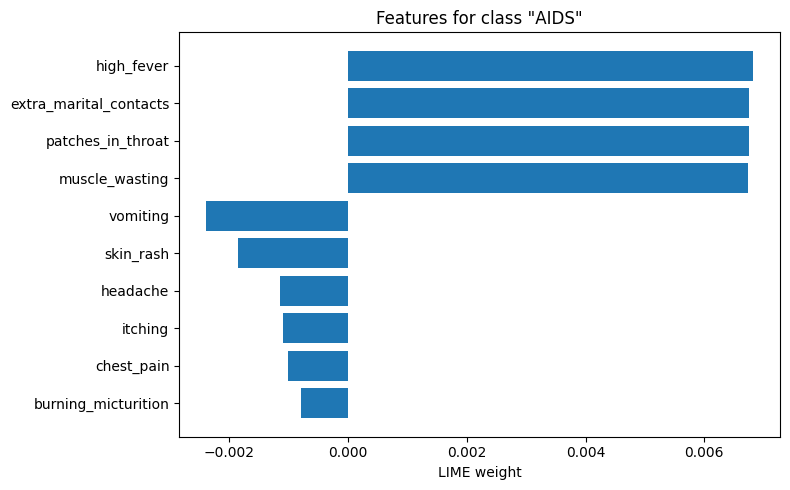

In [72]:
# 0) If in Jupyter, enable inline plotting
%matplotlib inline

# 1) Imports
import numpy as np
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer
from sklearn.base import BaseEstimator
from lime.lime_tabular import LimeTabularExplainer
    # or from lime.lime_text import LimeTextExplainer
    # or from lime.lime_image import LimeImageExplainer
# 2) The explanation function
def explain_symptom_prediction_chart(
    svc: BaseEstimator,
    symptom_list: list[str],
    symp_dict: dict[str, int],
    label_encoder,
    num_features: int = 10
) -> None:
    """
    Explains the svc.predict_proba on the one-hot symptom vector
    and plots the LIME feature weights for the actual top-predicted class.
    """
    # 2.1) Build the one-hot feature vector
    X_user = np.zeros(len(symp_dict), dtype=float)
    missing = [s for s in symptom_list if s not in symp_dict]
    if missing:
        raise KeyError(f"Unknown symptoms: {missing}")
    for s in symptom_list:
        X_user[symp_dict[s]] = 1.0

    # 2.2) Create the LIME explainer over identity matrix (each symptom
    #      treated as "training" to define the feature space)
    explainer = LimeTabularExplainer(
        training_data=np.eye(len(symp_dict)),
        feature_names=list(symp_dict.keys()),
        class_names=list(label_encoder.classes_),
        discretize_continuous=False,
        mode='classification'
    )

    # 2.3) Explain this single instance, requesting only the top label
    exp = explainer.explain_instance(
        X_user,
        svc.predict_proba,
        num_features=num_features,
        top_labels=1
    )
    # find which class index LIME actually used
    top_label = exp.top_labels[0]

    # 2.4) Get the weight list for that label
    feature_list = exp.as_list(label=top_label)
    if not feature_list:
        print("⚠️ No features to display.")
        return
    features, weights = zip(*feature_list)

    # 2.5) Plot horizontal bar chart
    plt.figure(figsize=(8, max(4, len(features) * 0.5)))
    y_pos = np.arange(len(features))
    plt.barh(y_pos, weights, align='center')
    plt.yticks(y_pos, features)
    plt.xlabel('LIME weight')
    plt.title(f'Features for class "{label_encoder.classes_[top_label]}"')
    plt.gca().invert_yaxis()  # highest weight on top
    plt.tight_layout()
    plt.show()
# Example “user” symptoms
 
# Now actually invoke the explainer
explain_symptom_prediction_chart(
    svc,
    user_symptoms,
    symp_dict,
    label_encoder
)


In [49]:
validation_data = [
    {
        "text": "I'm coughing a lot, feel very weak, and have a high fever since yesterday.",
        "expected": ["cough", "weakness_in_limbs", "high_fever"]
    },
    {
        "text": "I've been vomiting and have severe stomach pain. Also feeling nauseous.",
        "expected": ["vomiting", "stomach_pain", "nausea"]
    },
    {
        "text": "My head hurts and there's a patchy sore throat. Fever seems mild.",
        "expected": ["headache", "patches_in_throat", "mild_fever"]
    },
    {
        "text": "There's a lot of sneezing, runny nose, and throat irritation.",
        "expected": ["continuous_sneezing", "runny_nose", "throat_irritation"]
    },
    {
        "text": "Feeling tired, anxious, and having mood swings frequently.",
        "expected": ["fatigue", "anxiety", "mood_swings"]
    },
    {
        "text": "My joints are swollen and hurt badly, also experiencing stiffness in movement.",
        "expected": ["joint_pain", "swelling_joints", "movement_stiffness"]
    },
    {
        "text": "Been dizzy, seeing blurred things, and feel like I'm going to faint.",
        "expected": ["dizziness", "blurred_and_distorted_vision", "loss_of_balance"]
    },
    {
        "text": "Having chest pain, fast heartbeat and shortness of breath.",
        "expected": ["chest_pain", "fast_heart_rate", "breathlessness"]
    },
    {
        "text": "Red rashes on my skin, itching a lot and some pus-filled pimples too.",
        "expected": ["skin_rash", "itching", "pus_filled_pimples"]
    },
    {
        "text": "I feel bloated, have constipation and pain in the lower abdomen.",
        "expected": ["constipation", "abdominal_pain", "indigestion"]
    }
]


In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_threshold(threshold, model, symp_dict, validation_data):
    y_true, y_pred = [], []

    for item in validation_data:
        predicted = extract_symptoms_bert(item['text'], symp_dict, model, threshold=threshold)
        true = item['expected']

        all_symptoms = list(symp_dict.keys())
        y_true_bin = [1 if s in true else 0 for s in all_symptoms]
        y_pred_bin = [1 if s in predicted else 0 for s in all_symptoms]

        y_true.append(y_true_bin)
        y_pred.append(y_pred_bin)

    precision = precision_score(y_true, y_pred, average='micro')
    recall = recall_score(y_true, y_pred, average='micro')
    f1 = f1_score(y_true, y_pred, average='micro')

    return precision, recall, f1


Threshold: 0.50 | Precision: 0.54, Recall: 0.87, F1: 0.67
Threshold: 0.55 | Precision: 0.62, Recall: 0.87, F1: 0.72
Threshold: 0.60 | Precision: 0.70, Recall: 0.87, F1: 0.78
Threshold: 0.65 | Precision: 0.69, Recall: 0.83, F1: 0.76
Threshold: 0.70 | Precision: 0.81, Recall: 0.83, F1: 0.82
Threshold: 0.75 | Precision: 0.91, Recall: 0.67, F1: 0.77
Threshold: 0.80 | Precision: 0.89, Recall: 0.53, F1: 0.67
Threshold: 0.85 | Precision: 1.00, Recall: 0.43, F1: 0.60
Threshold: 0.90 | Precision: 1.00, Recall: 0.37, F1: 0.54

✅ Best threshold = 0.70 with F1 = 0.82


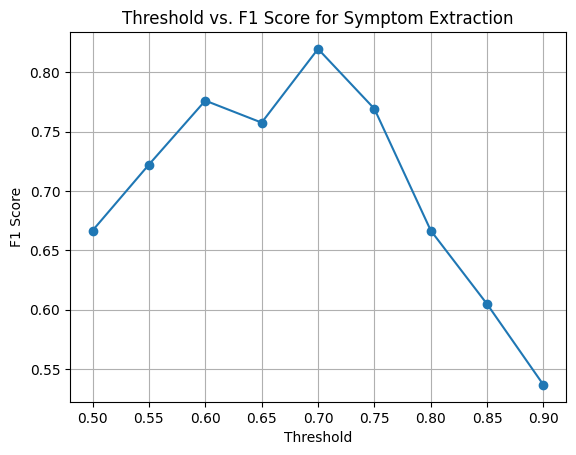

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Define the thresholds once
thresholds = np.arange(0.5, 0.91, 0.05)

best_thresh = 0
best_f1 = 0
f1s = []

# Evaluate F1 for each threshold
for t in thresholds:
    p, r, f1 = evaluate_threshold(t, model_bert, symp_dict, validation_data)
    print(f"Threshold: {t:.2f} | Precision: {p:.2f}, Recall: {r:.2f}, F1: {f1:.2f}")
    f1s.append(f1)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

print(f"\n✅ Best threshold = {best_thresh:.2f} with F1 = {best_f1:.2f}")

# Plot
plt.plot(thresholds, f1s, marker='o')
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("Threshold vs. F1 Score for Symptom Extraction")
plt.grid(True)
plt.show()


# validation done hyperparameter tuning done threshold=0.7